In [1]:
###
#==================== We set product parameters to download ====================
destination_path = '../GOESimages/'
product_list = { # ABI Products
"ABI-L2-ACHAF": "Cloud Top Height",
"ABI-L2-ACHTF": "Cloud Top Temperature",
"ABI-L2-ACMF": "Clear Sky  Mask",
"ABI-L2-ACTPF": "Cloud Top Phase",
## "ABI-L2-DMWVF": "Derived Motion Winds - Vapor",
## "ABI-L2-DSRF": "Downward Shortwave Radiation",
"ABI-L2-LSTF": "Land Surface Temperature",
"ABI-L2-RRQPEF": "Rainfall rate",
"ABI-L2-TPWF": "Total Precipitable Water",
}
products = list(product_list)
#==================== Setting up time reference variables ====================
from datetime import datetime, timedelta, timezone
import os, pytz, time
utc = pytz.timezone('UTC') # UTC timezone
utcm5 = pytz.timezone('America/Lima') # UTC-5 timezone
from IPython.display import display, Image, clear_output
import numpy as np
import GOESutils.GOESplots as gplt
import GOESutils.GOESimport as gimp
import GOESutils.DataBaseUtils as dbu
import importlib, sys
###

/home/german/miniconda3/envs/satimg/lib/python3.11/site-packages/toolbox/cartopy_tools_OLD.py:37: UserWarning: Migrate to new `cartopy_tools` for latest updates and features.
  warnings.warn("Migrate to new `cartopy_tools` for latest updates and features.")
/home/german/miniconda3/envs/satimg/lib/python3.11/site-packages/toolbox/cartopy_tools_OLD.py:241: AccessorRegistrationWarning: registration of accessor <class 'toolbox.cartopy_tools_OLD.xr_to_cartopy'> under name 'xmap' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  @xr.register_dataset_accessor("xmap")


# Products in a time range

In [ ]:
# importlib.reload(sys.modules['GOESutils.GOESimport'])
# import GOESutils.GOESimport as gimp
startdate = datetime(2020,1,1,tzinfo=utcm5)
enddate = datetime(2020,2,1,tzinfo=utcm5)
prodFileList = gimp.GOESfiles("timerange", startdate, enddate, freq=timedelta(minutes=30),
                              target_product="RadF", bands=14,
                              to_display=True, download=False)

In [ ]:
initial_time = datetime.now(utcm5)
product = prodFileList['product'][0]
for f in list(prodFileList['file']): # Reading each file downloaded
    print("Working with file: {}".format(os.path.basename(f)))                
    FullFileName = os.path.join(destination_path,f)
    data, ProductParams = gimp.ImportingData(FullFileName, product)
    data = gimp.CleaningData(data, product)
    dataset = gplt.export_as(data, ProductParams["DataAttrs"], 
                        filename=ProductParams["DataAttrs"]['dataset_name'],
                        path="./GOESimages/Data")
    

    # Check if it's time to clear the output
    CurrentTime = datetime.now(utcm5)
    minute, seconds = CurrentTime.minute, CurrentTime.second
    elapsed_time = CurrentTime - initial_time
    if elapsed_time >= timedelta(minutes=1):
        # Clear the output
        clear_output(wait=True)
        # Reset the start time
        initial_time = datetime.now(utcm5)
        
print("All the files have been processed.")

In [ ]:
initial_time = datetime.now(utcm5)
for product in products:
    for f in list(prodFileList['file']): # Reading each file downloaded
        print("Working with file: {}".format(os.path.basename(f)))                
        FullFileName = os.path.join(destination_path,f)
        data, ProductParams = gimp.ImportingData(FullFileName, product)
        data = gimp.CleaningData(data, product)
        FullImageName = os.path.join(ProductParams["ImagePath"],"Peru",ProductParams["ImageName"])
        if os.path.exists(FullImageName): # If png image exists, it is shown
            print("Image '{}' already exists in '{}'".format(ProductParams["ImageName"],ProductParams["ImagePath"]))
            display(Image(filename=FullImageName, width=640))
        else: # Creating png image
            file_datetime = ProductParams["ImageTime"].astimezone(utc)
            gFileList = goes_nearesttime(file_datetime.replace(tzinfo=None), product="ABI-L2-MCMIPF", return_as="filelist", download=True, save_dir=destination_path)
            try:
                RGBdata, GeoColorParams = gimp.GeoColorData(os.path.join(destination_path,gFileList.iloc[0]["file"]))
            except:
                gFileList = goes_nearesttime(file_datetime.replace(tzinfo=None), product="ABI-L2-MCMIPF", return_as="filelist", download=True, save_dir=destination_path, overwrite=True)
                RGBdata, GeoColorParams = gimp.GeoColorData(os.path.join(destination_path,gFileList.iloc[0]["file"]))
            figGeo, axGeo = gplt.GeoColorPlot(RGBdata, GeoColorParams, toSave=False, toDisplay=False, toUpload=False, dpi=300)
            if (not os.path.exists(ProductParams["ImagePath"])):
                print(f"Directory for product {product} does not exist. Creating new one...") 
                os.makedirs(ProductParams["ImagePath"])
            print(f"Image for file {os.path.basename(f)} not found, creating one...")
            figProd = gplt.ProductPlot(data, product, axGeo, ProductParams, toSave=True, toDisplay=True, toUpload=False, dpi=600)

        # Check if it's time to clear the output
        CurrentTime = datetime.now(utcm5)
        minute, seconds = CurrentTime.minute, CurrentTime.second
        elapsed_time = CurrentTime - initial_time
        if elapsed_time >= timedelta(minutes=1):
            # Clear the output
            clear_output(wait=True)
            # Reset the start time
            initial_time = datetime.now(utcm5)
            
    print("All the files have been processed.")

In [ ]:
importlib.reload(sys.modules['GOESutils.GOESplots'])
import GOESutils.GOESplots as gplt
ImagesPath = ".\GOESimages\Products\ACHA\Peru"
ImagesInfo = gplt.GettingImagesInfo(ImagesPath, start_date=startdate, end_date=enddate)
gplt.GOESvideos(ImagesInfo, VideoPath=".\GOESimages\Products\ACHA", extension=".avi")

# Products in real time

Current time is: 2023-11-23 19:26:48 -05
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...


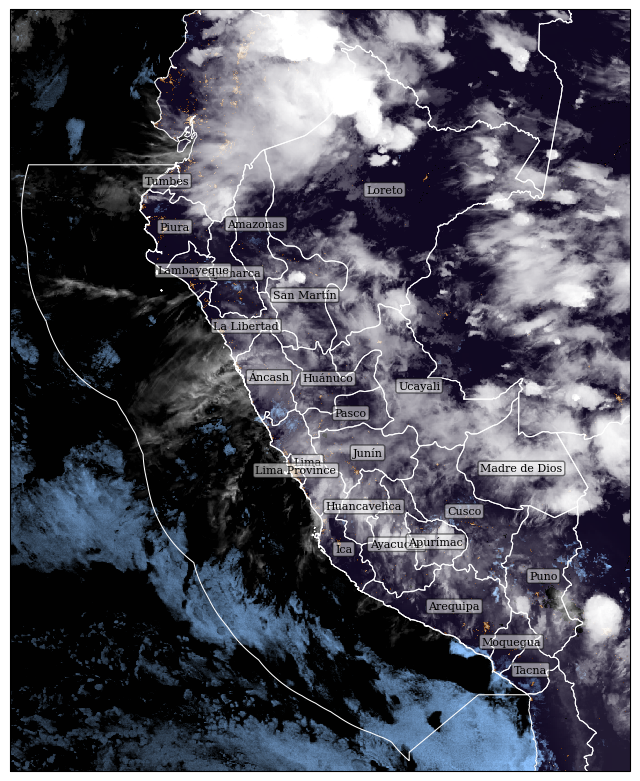

Searching for products: ABI-L2-ACHAF, ABI-L2-ACHTF, ABI-L2-ACMF, ABI-L2-ACTPF, ABI-L2-LSTF, ABI-L2-RRQPEF, ABI-L2-TPWF (Press 'esc' to stop)
Looking for product ABI-L2-TPWF, set of files from date 24-Nov-2023 00:00 0 
Total Size: 59.00 MB


file  \
0  noaa-goes16/ABI-L2-ACHAF/2023/328/00/OR_ABI-L2...   
1  noaa-goes16/ABI-L2-ACHTF/2023/328/00/OR_ABI-L2...   
2  noaa-goes16/ABI-L2-ACMF/2023/328/00/OR_ABI-L2-...   
3  noaa-goes16/ABI-L2-ACTPF/2023/328/00/OR_ABI-L2...   
4  noaa-goes16/ABI-L2-LSTF/2023/328/00/OR_ABI-L2-...   
5  noaa-goes16/ABI-L2-RRQPEF/2023/328/00/OR_ABI-L...   
6  noaa-goes16/ABI-L2-TPWF/2023/328/00/OR_ABI-L2-...   

                      start                       end  \
0 2023-11-23 19:10:20-05:00 2023-11-23 19:19:51-05:00   
1 2023-11-23 19:10:20-05:00 2023-11-23 19:19:51-05:00   
2 2023-11-23 19:10:20-05:00 2023-11-23 19:19:51-05:00   
3 2023-11-23 19:10:20-05:00 2023-11-23 19:19:51-05:00   
4 2023-11-23 19:00:20-05:00 2023-11-23 19:09:51-05:00   
5 2023-11-23 19:10:20-05:00 2023-11-23 19:19:51-05:00   
6 2023-11-23 19:10:20-05:00 2023-11-23 19:19:51-05:00   

                   creation        product  band      size  
0 2023-11-23 19:22:55-05:00   ABI-L2-ACHAF  None   1.49 MB  
1 2023-11-23 19:22:56-05:00   ABI-L2-ACHTF  None  27.03 MB  
2 2023-11-23 19:20:33-05:00    ABI-L2-ACMF  None  23.32 MB  
3 2023-11-23 19:21:09-05:00   ABI-L2-ACTPF  None   3.79 MB  
4 2023-11-23 19:10:39-05:00    ABI-L2-LSTF  None   0.59 MB  
5 2023-11-23 19:19:59-05:00  ABI-L2-RRQPEF  None   1.76 MB  
6 2023-11-23 19:21:31-05:00    ABI-L2-TPWF  None   1.02 MB

Working with file: OR_ABI-L2-ACHAF-M6_G16_s20233280010208_e20233280019516_c20233280022559.nc
Image for file OR_ABI-L2-ACHAF-M6_G16_s20233280010208_e20233280019516_c20233280022559.nc not found, creating one...
Image G16_ACHA_2023_11_23_19_19.png saved in '../GOESimages/Products/ACHA/Peru'


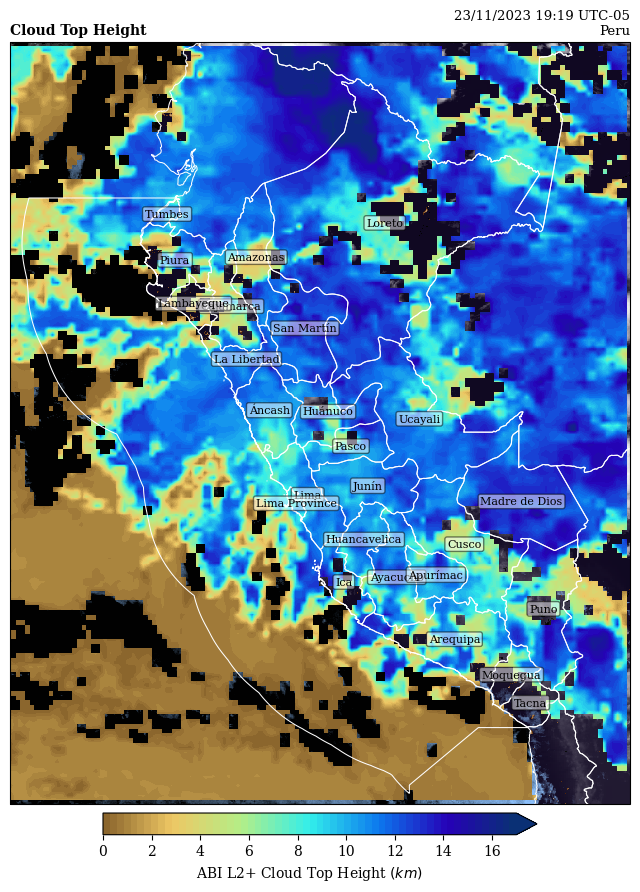

File G16_ACHA_2023_11_23_19_19.png uploaded to 'Images/Type3' as G16_ACHA_2023_11_23_19_19.png
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACHA_2023_11_23_19_19_Amazonas.png saved in '../GOESimages/Products/ACHA/Amazonas'
File G16_ACHA_2023_11_23_19_19_Amazonas.png uploaded to 'Images/T3Amazonas' as G16_ACHA_2023_11_23_19_19_Amazonas.png
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACHA_2023_11_23_19_19_Ancash.png saved in '../GOESimages/Products/ACHA/Ancash'
File G16_ACHA_2023_11_23_19_19_Ancash.png uploaded to 'Images/T3Ancash' as G16_ACHA_2023_11_23_19_19_Ancash.png
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACHA_2023_11_23_19_19_Apurímac.png saved in '../GOESimages/Products/ACHA/Apurímac'
File G16_ACHA_2023_11_23_19_19_Apurímac.png uploaded to 'Images/T3Apurimac' as G16_ACHA_2023_11_23_19_1

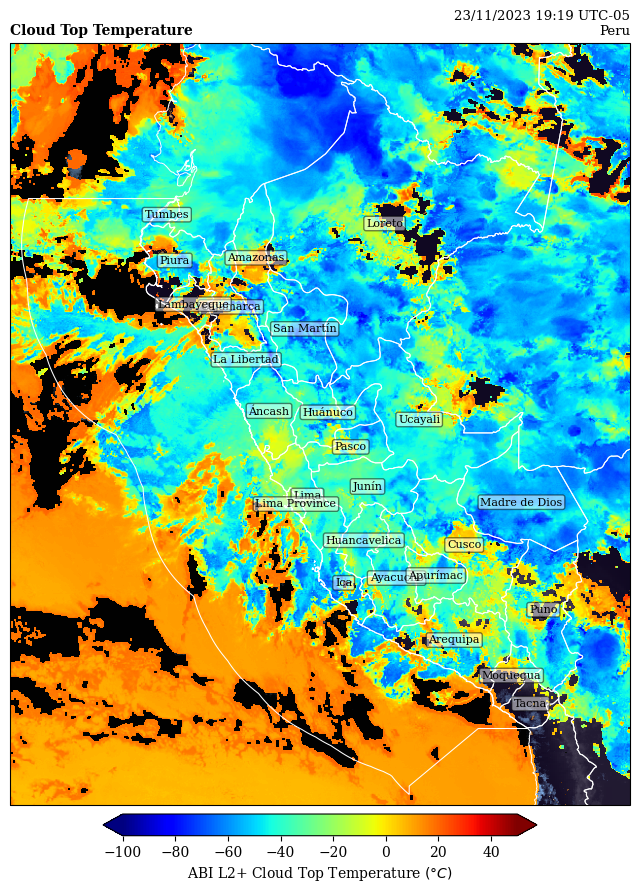

File G16_ACHT_2023_11_23_19_19.png uploaded to 'Images/Type4' as G16_ACHT_2023_11_23_19_19.png
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACHT_2023_11_23_19_19_Amazonas.png saved in '../GOESimages/Products/ACHT/Amazonas'
File G16_ACHT_2023_11_23_19_19_Amazonas.png uploaded to 'Images/T4Amazonas' as G16_ACHT_2023_11_23_19_19_Amazonas.png
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACHT_2023_11_23_19_19_Ancash.png saved in '../GOESimages/Products/ACHT/Ancash'
File G16_ACHT_2023_11_23_19_19_Ancash.png uploaded to 'Images/T4Ancash' as G16_ACHT_2023_11_23_19_19_Ancash.png
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACHT_2023_11_23_19_19_Apurímac.png saved in '../GOESimages/Products/ACHT/Apurímac'
File G16_ACHT_2023_11_23_19_19_Apurímac.png uploaded to 'Images/T4Apurimac' as G16_ACHT_2023_11_23_19_1

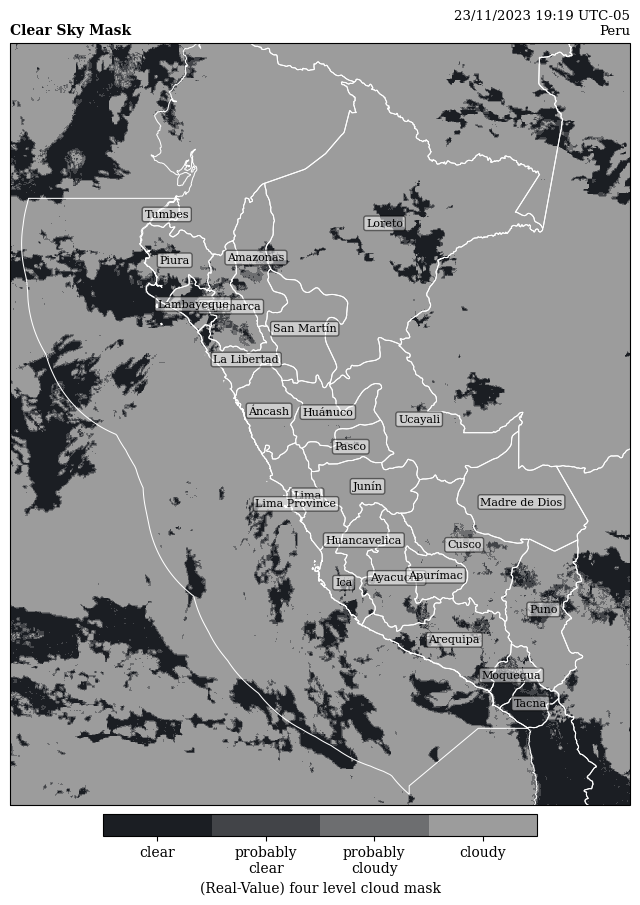

File G16_ACM_2023_11_23_19_19.png uploaded to 'Images/Type5' as G16_ACM_2023_11_23_19_19.png
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACM_2023_11_23_19_19_Amazonas.png saved in '../GOESimages/Products/ACM/Amazonas'
File G16_ACM_2023_11_23_19_19_Amazonas.png uploaded to 'Images/T5Amazonas' as G16_ACM_2023_11_23_19_19_Amazonas.png
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACM_2023_11_23_19_19_Ancash.png saved in '../GOESimages/Products/ACM/Ancash'
File G16_ACM_2023_11_23_19_19_Ancash.png uploaded to 'Images/T5Ancash' as G16_ACM_2023_11_23_19_19_Ancash.png
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACM_2023_11_23_19_19_Apurímac.png saved in '../GOESimages/Products/ACM/Apurímac'
File G16_ACM_2023_11_23_19_19_Apurímac.png uploaded to 'Images/T5Apurimac' as G16_ACM_2023_11_23_19_19_Apurímac.png

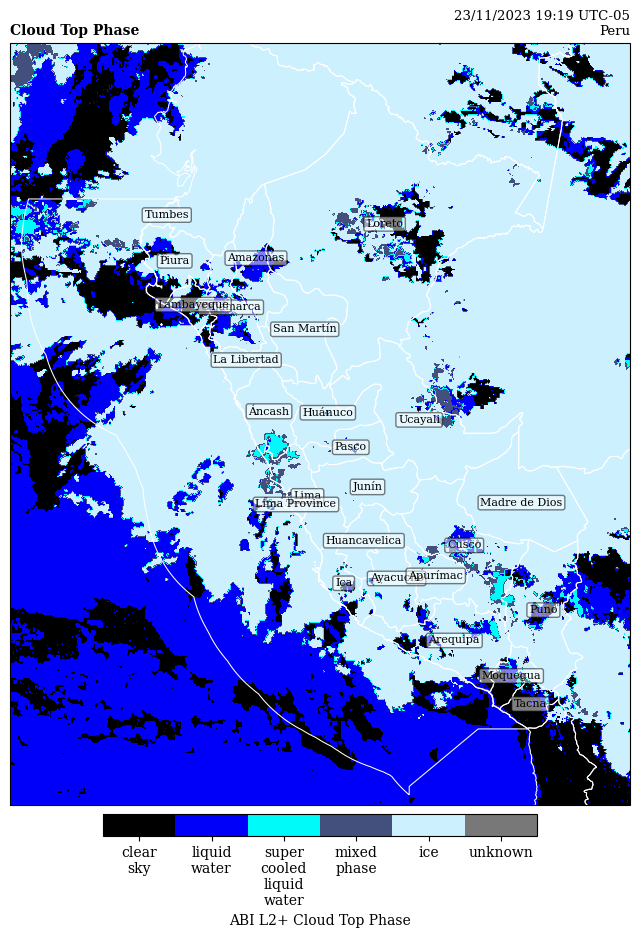

File G16_ACTP_2023_11_23_19_19.png uploaded to 'Images/Type8' as G16_ACTP_2023_11_23_19_19.png
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACTP_2023_11_23_19_19_Amazonas.png saved in '../GOESimages/Products/ACTP/Amazonas'
File G16_ACTP_2023_11_23_19_19_Amazonas.png uploaded to 'Images/T8Amazonas' as G16_ACTP_2023_11_23_19_19_Amazonas.png
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACTP_2023_11_23_19_19_Ancash.png saved in '../GOESimages/Products/ACTP/Ancash'
File G16_ACTP_2023_11_23_19_19_Ancash.png uploaded to 'Images/T8Ancash' as G16_ACTP_2023_11_23_19_19_Ancash.png
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACTP_2023_11_23_19_19_Apurímac.png saved in '../GOESimages/Products/ACTP/Apurímac'
File G16_ACTP_2023_11_23_19_19_Apurímac.png uploaded to 'Images/T8Apurimac' as G16_ACTP_2023_11_23_19_1

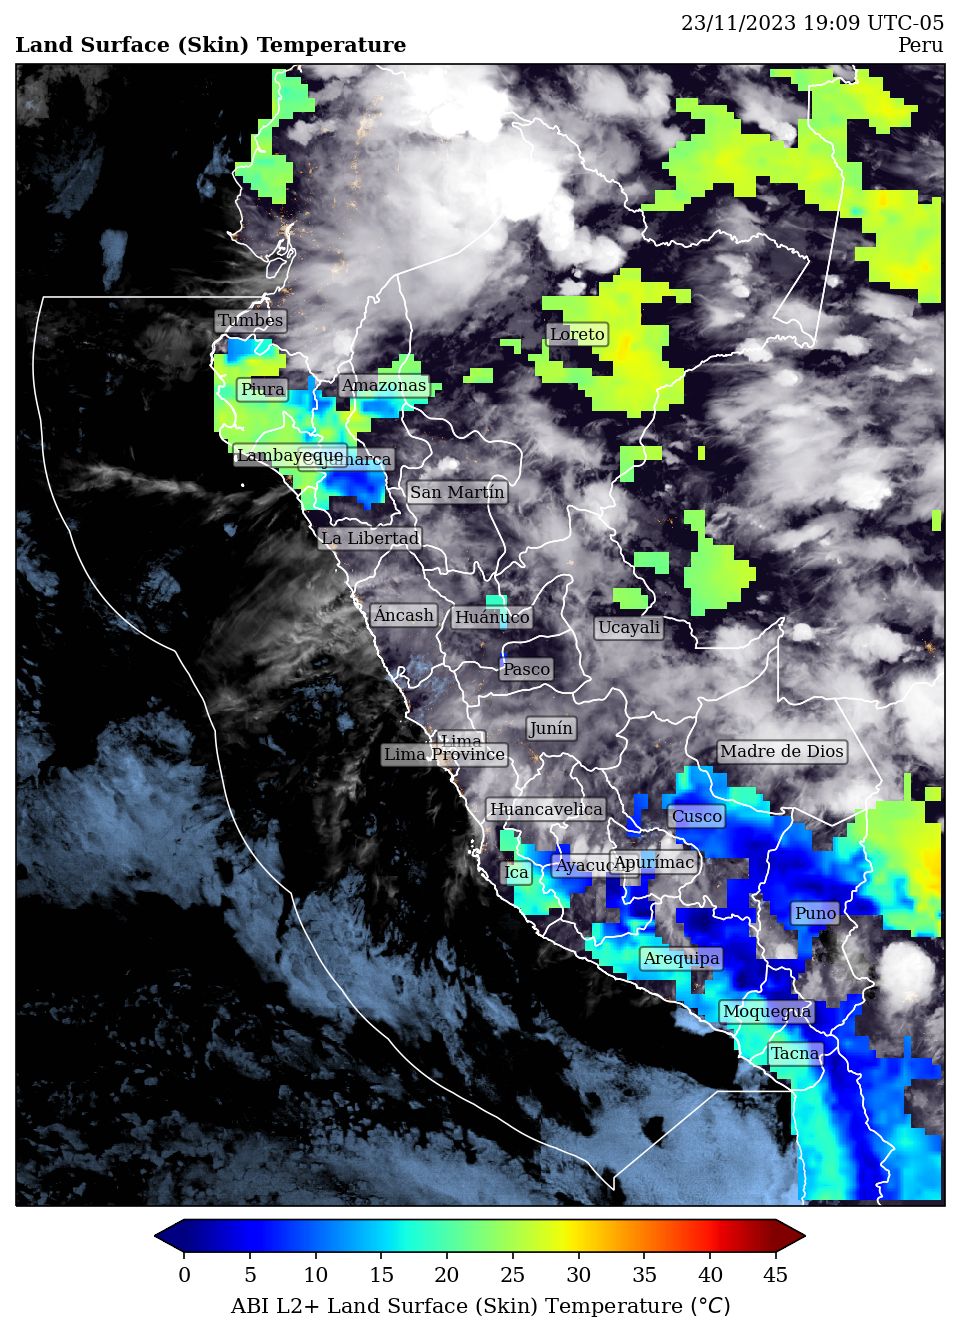

Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...
Image G16_LST_2023_11_23_19_09_Amazonas.png saved in '../GOESimages/Products/LST/Amazonas'
File G16_LST_2023_11_23_19_09_Amazonas.png uploaded to 'Images/T2Amazonas' as G16_LST_2023_11_23_19_09_Amazonas.png
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...
Image G16_LST_2023_11_23_19_09_Ancash.png saved in '../GOESimages/Products/LST/Ancash'
File G16_LST_2023_11_23_19_09_Ancash.png uploaded to 'Images/T2Ancash' as G16_LST_2023_11_23_19_09_Ancash.png
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...
Image G16_LST_2023_11_23_19_09_Apurímac.png saved in '../GOESimages/Products/LST/Apurímac'
File G16_LST_2023_11_23_19_09_Apurímac.png uploaded to 'Images/T2Apurimac' as G16_LST_2023_11_23_19_09_Apurímac.png
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor im

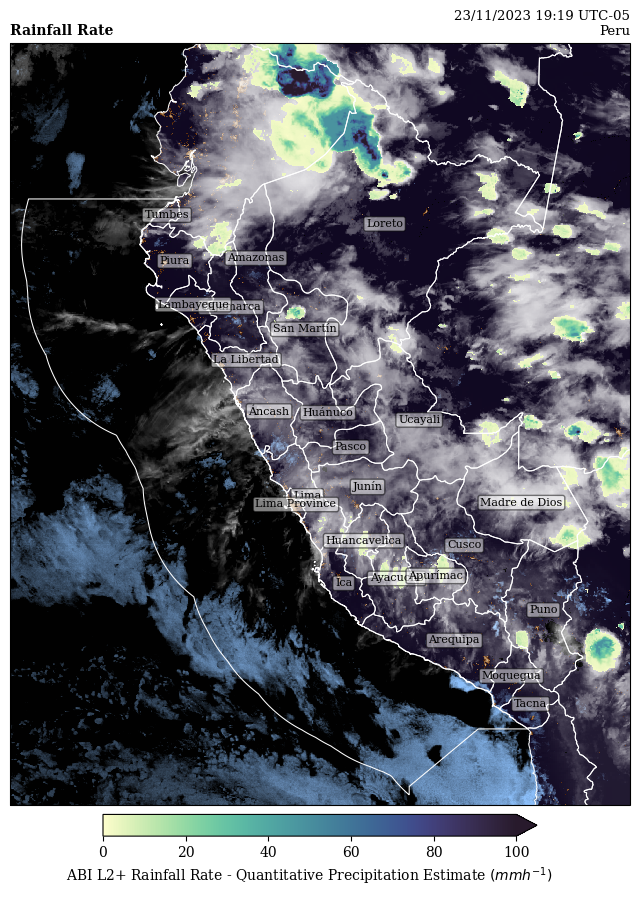

File G16_RRQPE_2023_11_23_19_19.png uploaded to 'Images/Type6' as G16_RRQPE_2023_11_23_19_19.png
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...
Image G16_RRQPE_2023_11_23_19_19_Amazonas.png saved in '../GOESimages/Products/RRQPE/Amazonas'
File G16_RRQPE_2023_11_23_19_19_Amazonas.png uploaded to 'Images/T6Amazonas' as G16_RRQPE_2023_11_23_19_19_Amazonas.png
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...
Image G16_RRQPE_2023_11_23_19_19_Ancash.png saved in '../GOESimages/Products/RRQPE/Ancash'
File G16_RRQPE_2023_11_23_19_19_Ancash.png uploaded to 'Images/T6Ancash' as G16_RRQPE_2023_11_23_19_19_Ancash.png
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...
Image G16_RRQPE_2023_11_23_19_19_Apurímac.png saved in '../GOESimages/Products/RRQPE/Apurímac'
File G16_RRQPE_2023_11_23_19_19_Apurímac.png uploaded to 'Images/T6Apurimac' as G16_RRQPE_2

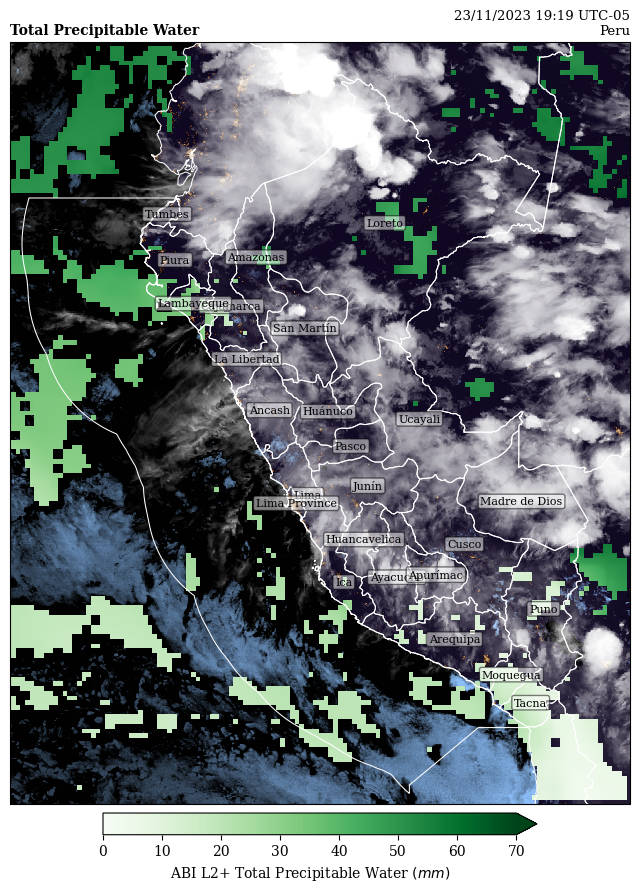

File G16_TPW_2023_11_23_19_19.png uploaded to 'Images/Type7' as G16_TPW_2023_11_23_19_19.png
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...
Image G16_TPW_2023_11_23_19_19_Amazonas.png saved in '../GOESimages/Products/TPW/Amazonas'
File G16_TPW_2023_11_23_19_19_Amazonas.png uploaded to 'Images/T7Amazonas' as G16_TPW_2023_11_23_19_19_Amazonas.png
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...
Image G16_TPW_2023_11_23_19_19_Ancash.png saved in '../GOESimages/Products/TPW/Ancash'
File G16_TPW_2023_11_23_19_19_Ancash.png uploaded to 'Images/T7Ancash' as G16_TPW_2023_11_23_19_19_Ancash.png
Plotting geocolor image at 2023-11-24 00:20:00+00:00.
It is nighttime! Plotting TrueColor image...
Image G16_TPW_2023_11_23_19_19_Apurímac.png saved in '../GOESimages/Products/TPW/Apurímac'
File G16_TPW_2023_11_23_19_19_Apurímac.png uploaded to 'Images/T7Apurimac' as G16_TPW_2023_11_23_19_19_Apurímac.png

TooManyRequests: 429 POST https://storage.googleapis.com/upload/storage/v1/b/eata-project.appspot.com/o?uploadType=multipart: {
  "error": {
    "code": 429,
    "message": "App s~eata-project does not have enough quota",
    "errors": [
      {
        "message": "App s~eata-project does not have enough quota",
        "domain": "usageLimits",
        "reason": "rateLimitExceeded"
      }
    ]
  }
}
: ('Request failed with status code', 429, 'Expected one of', <HTTPStatus.OK: 200>)

In [2]:
# importlib.reload(sys.modules['GOESutils.GOESimport'])
# import GOESutils.GOESimport as gimp
# importlib.reload(sys.modules['GOESutils.GOESplots'])
# import GOESutils.GOESplots as gplt

toUpload = True
while True:
    clear_output(wait=True)
    CurrentTime = datetime.now(utcm5)
    CurrentTime_str = CurrentTime.strftime('%Y-%m-%d %H:%M:%S %Z')
    print("============================================================")
    print("Current time is: {}".format(CurrentTime_str))
    # gFileList = gimp.GOESfiles("latest", target_product="ABI-L2-MCMIP", download=True)
    # f = gFileList.iloc[0]
    # RGBdata, GeoColorParams = gimp.GeoColorData(os.path.join(destination_path,f["file"]))
    RGBdata, GeoColorParams = gplt.GeoColorTif(destination_path)
    figGeo, axGeo = gplt.GeoColorPlot(RGBdata, GeoColorParams, toSave=True, toDisplay=True, toUpload=False, dpi=150)
    prodFileList = gimp.GOESfiles("latest", target_product=products, to_display=True, download=True)
    for product in products:
        
        f = prodFileList[prodFileList["product"]==product].iloc[0]
        FullFileName = os.path.join(destination_path,f["file"])
        data, ProductParams = gimp.ImportingData(FullFileName, product)
        data = gimp.CleaningData(data, product)
        data_re = gimp.interpolate_products(data, product, n=5)
                                                    
        print("Working with file: {}".format(os.path.basename(f['file'])))                
        FullImageName = os.path.join(ProductParams["ImagePath"],"Peru",ProductParams["ImageName"])
        if os.path.exists(FullImageName): # If png image exists, it is shown
            print("Image [{}] already exists in [{}]".format(ProductParams["ImageName"],ProductParams["ImagePath"]))
            display(Image(filename=FullImageName)) # , width=540   
        else: # Creating png image
            if not os.path.exists(ProductParams["ImagePath"]):
                print(f"Directory for product {product} does not exist. Creating new one...") 
                os.makedirs(ProductParams["ImagePath"])
            print(f"Image for file {os.path.basename(f['file'])} not found, creating one...")
            figProd = gplt.ProductPlot(data_re, product, axGeo, ProductParams, toSave=True, toDisplay=True, toUpload=toUpload, dpi=150)

        # # try: # Deleting downloaded product
        # #     os.remove(FullFileName)
        # #     print(f"File '{FullFileName}' has been removed.")
        # # except FileNotFoundError:
        # #     print(f"File '{FullFileName}' not found.")
        # # except Exception as e:
        # #     print(f"An error occurred while deleting the file: {e}")
            
        for dep in gplt.departments:
            gplt.DepartmentPlot(product, dep, RGBdata, GeoColorParams, data_re, ProductParams, toSave=True, toDisplay=False, toUpload=toUpload)
        reports = gplt.ReportingEvents(data, product, level="L3", send_comments=True)
            
        print("All the files have been processed.")
        

    try: # Check if it's time to clear the output
        CurrentTime = datetime.now(utcm5)
        hour, minute, seconds = CurrentTime.hour, CurrentTime.minute, CurrentTime.second
        if (hour==23 and minute>55): # (elapsed_time >= timedelta(hours=3)) or 
            print("Cleaning database")
            for i in range(2,9):
                folder = f"Images/Type{i}"
                dbu.DeleteFile(folder)
                for d in gplt.departments_folder:
                    folder = f"Images/T{i}{d}"
                    dbu.DeleteFile(folder)
            
        total_remaining_seconds = (5 - (int(minute) % 5)) * 60 - int(seconds)
        remaining_minutes = total_remaining_seconds // 60
        print("Waiting {} minutes for the next file upload".format(remaining_minutes + 2))
        time.sleep((remaining_minutes+2)*60)
    except Exception as e:
        print("Elapsed time attempting failed.")